## Exploring Disk Caching in Databricks
- Disk cache : Caches source files present on lake on to worker nodes 
  - Only for Parquet/Delta tables - Not for CSV, JSON or ORC etc.
  - Chose Delta cache accelerated type worker - high volume SSDs
  - Can avoid I/O thread to data lake
  - Maintains file consistency - detects changes to the underlying parquet files on the Data Lake and maintain its cache
  - CACHE SELECT ...
  - spark.databricks.io.cache.maxDiskUsage - disk space per node - bytes
  - spark.databricks.io.cache.maxMetaDataCache - disk space per node - cached metadata - bytes
  - spark.databricks.io.cache.compression.enabled - compression enabled - True/False
- Spark cache : Caches content of dataframe - df.cache()

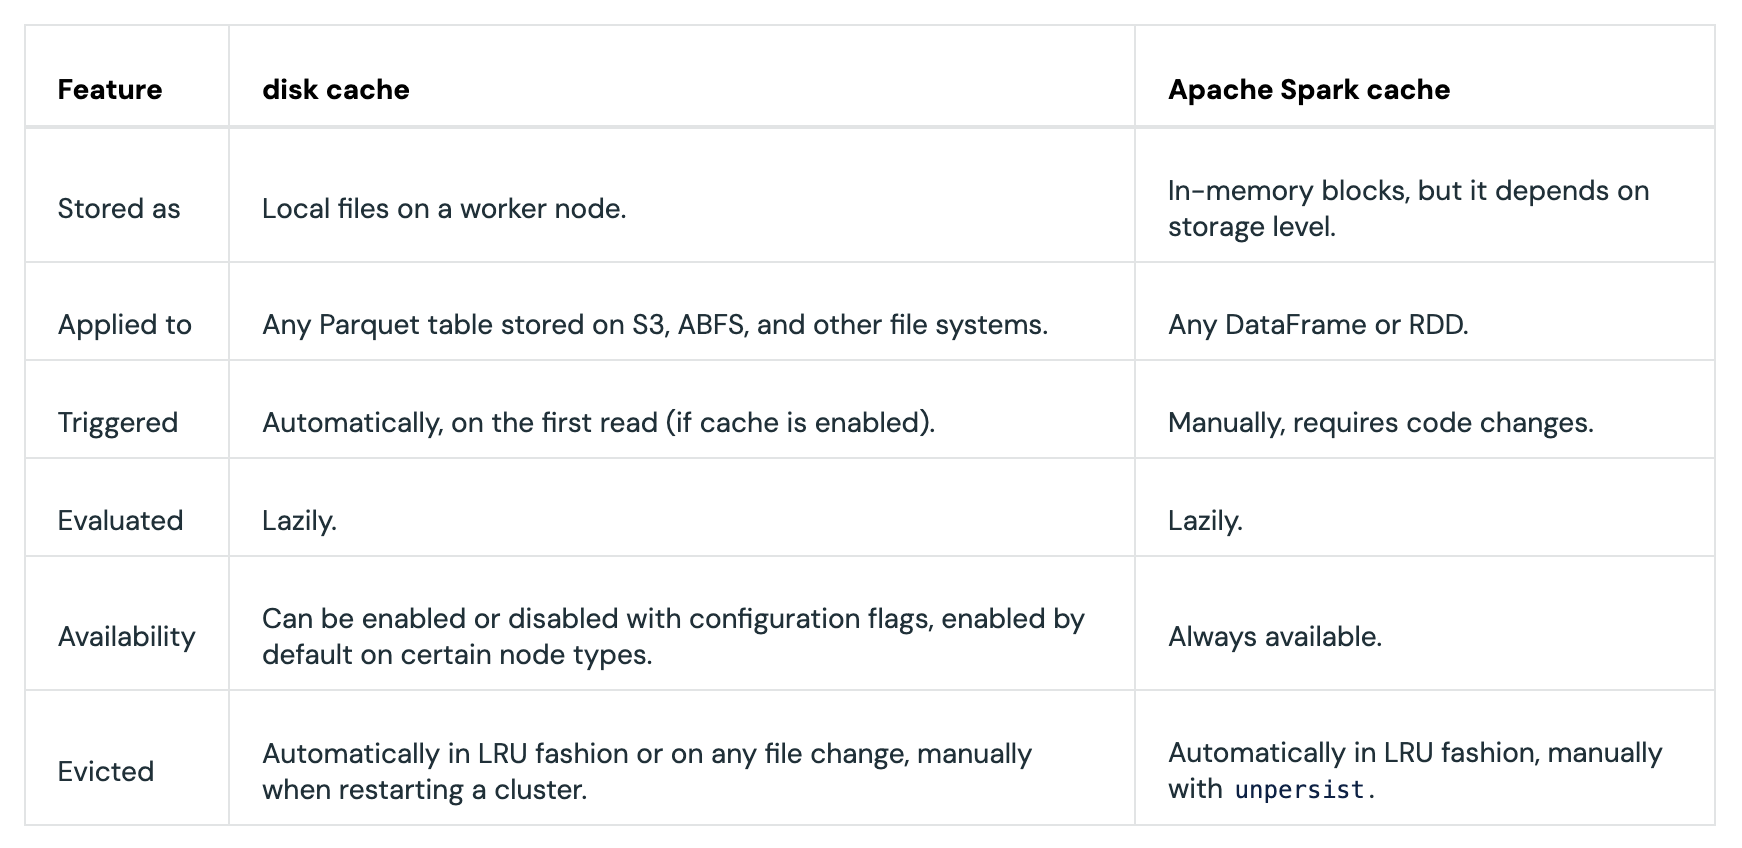

In [1]:
from IPython.display import Image
Image(filename='../UI_screenshots/caching/DiskCache.png',width=1100,height=10)

Warming Up Catalog

In [0]:
%sql
show tables in samples.tpch

database,tableName,isTemporary
tpch,customer,false
tpch,lineitem,false
tpch,nation,false
tpch,orders,false
tpch,part,false
tpch,partsupp,false
tpch,region,false
tpch,supplier,false


In [0]:
orders_df = spark.sql("""select * from samples.tpch.orders """)
orders_df.count()

Out[2]: 7500000

Spark Pre Cache

In [0]:
lineitem_df = spark.sql("""select * from samples.tpch.lineitem where l_returnflag = 'A' """)

In [0]:
import time
start = time.time()
print(lineitem_df.count())
print("Spark Pre Cache - Time taken:", time.time() - start)

7403889
Spark Pre Cache - Time taken: 13.511442184448242


Spark Post Cache

In [0]:
start = time.time()
lineitem_df.cache()
print(lineitem_df.count())
print("Spark Cache - Time taken:", time.time() - start)

7403889
Spark Cache - Time taken: 62.85440278053284


In [0]:
start = time.time()
print(lineitem_df.count())
print("Spark Post Cache - Time taken:", time.time() - start)

7403889
Spark Post Cache - Time taken: 0.4989898204803467


Disk Pre Cache

In [0]:
%sql
select count(*) from samples.tpch.lineitem where l_returnflag = 'A'

count(1)
7403889


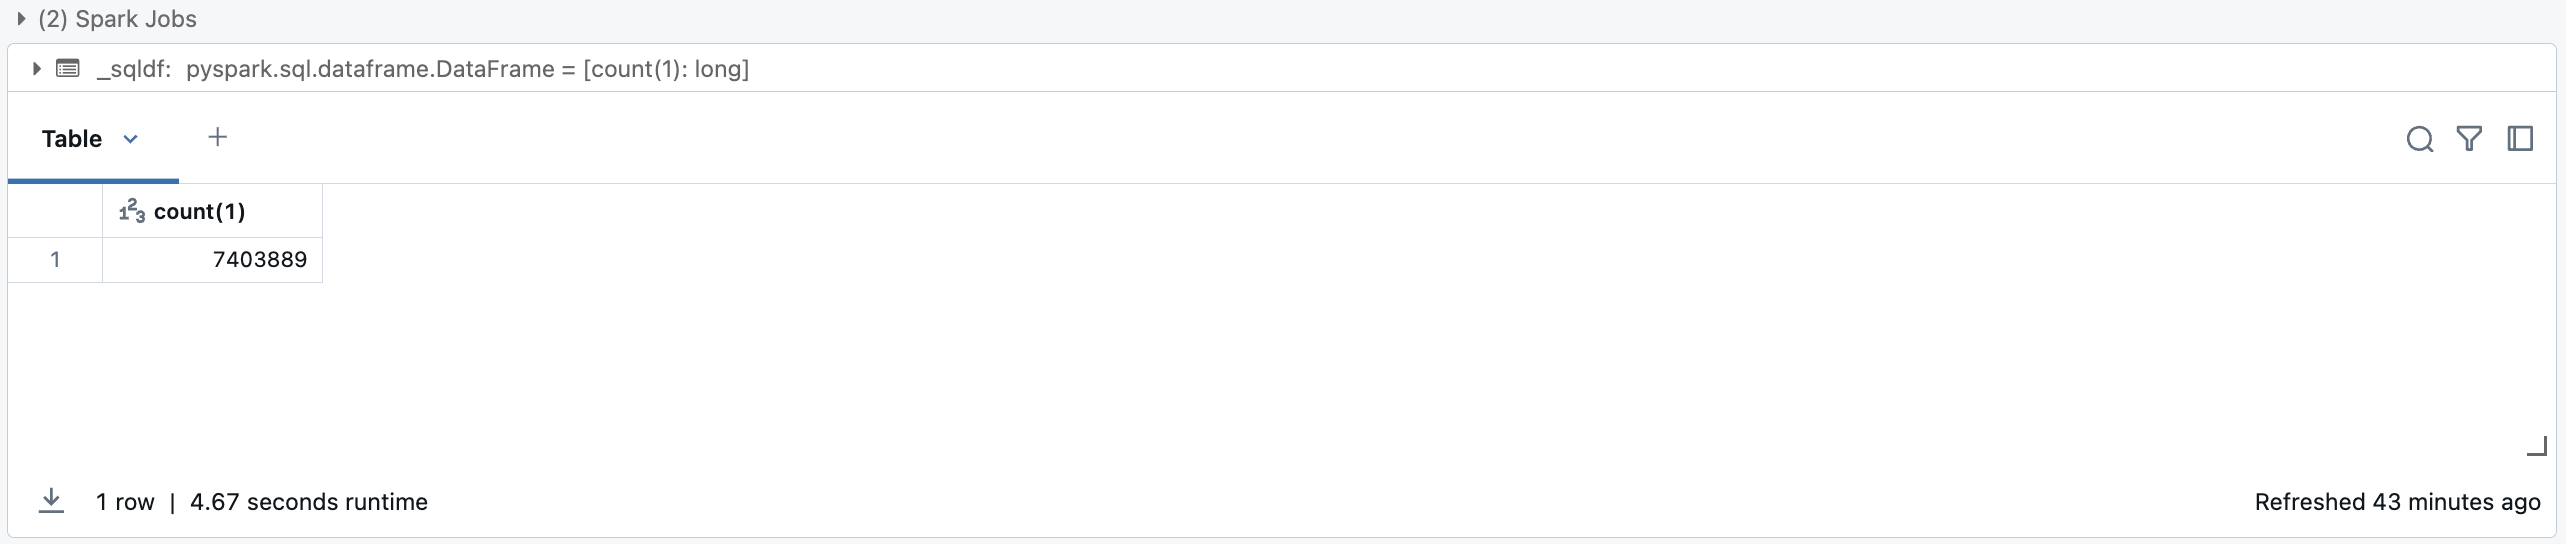

In [4]:
# Time taken before disk caching
from IPython.display import Image
Image(filename='../UI_screenshots/caching/Diskcache4.png',width=1100,height=10)

In [0]:
spark.conf.get("spark.databricks.io.cache.enabled")

Out[9]: 'false'

In [0]:
spark.conf.set("spark.databricks.io.cache.enabled","true")

Post Disk Cache

In [0]:
%sql
cache select * from samples.tpch.lineitem

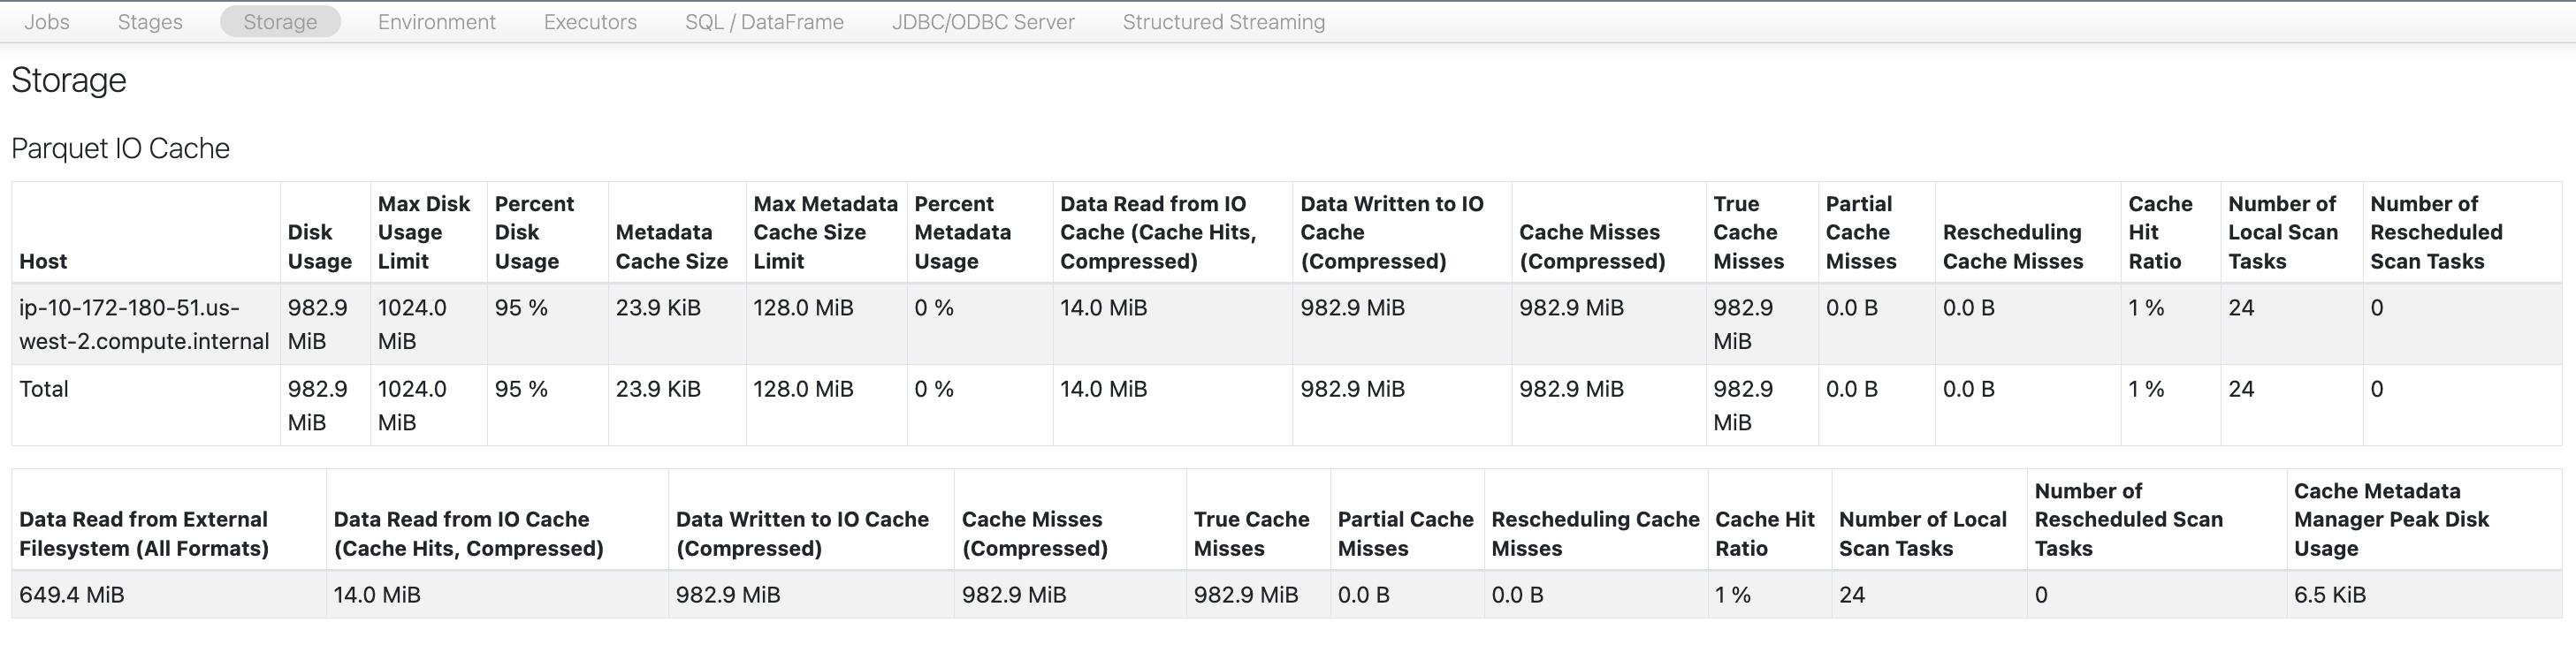

In [2]:
from IPython.display import Image
Image(filename='../UI_screenshots/caching/Diskcache2.png',width=1100,height=10)

In [0]:
%sql
select count(*) from samples.tpch.lineitem where l_returnflag = 'A'

count(1)
7403889


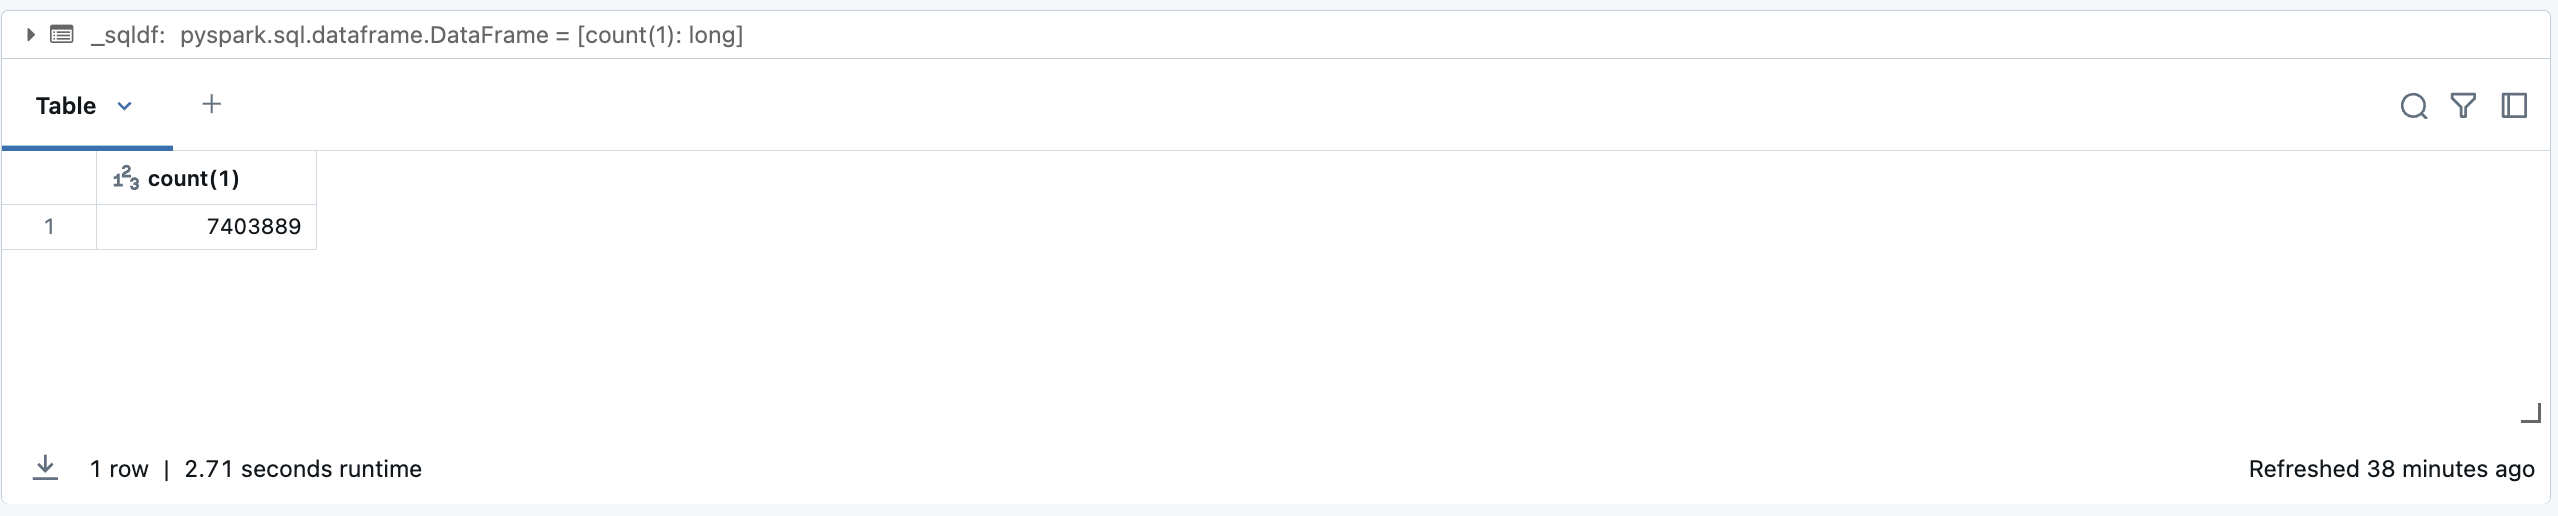

In [5]:
# Time taken after disk cache
from IPython.display import Image
Image(filename='../UI_screenshots/caching/Diskcache3.png',width=1100,height=10)

In [0]:
spark.conf.get("spark.databricks.io.cache.maxDiskUsage")

Out[8]: '1073741824b'

In [0]:
spark.conf.get("spark.databricks.io.cache.maxMetaDataCache")

Out[8]: '134217728b'

In [0]:
spark.conf.get("spark.databricks.io.cache.compression.enabled")

Out[3]: 'false'